In [2]:
import pandas as pd

In [3]:
cali_gear1_df = pd.read_csv("GEAR1495_California.dat")

In [4]:
cali_gear1_df.describe()

,Unnamed: 0,longitude,latitude,m495,m505,m515,m525,m535,m545,m555,...,m805,m815,m825,m835,m845,m855,m865,m875,m885,m895
count,7682.000000,7682.000000,7682.000000,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,...,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03
mean,3840.500000,-119.648112,37.250104,5.737064e-11,4.557112e-11,3.619842e-11,2.875343e-11,2.283966e-11,1.814219e-11,1.441085e-11,...,1.051175e-14,6.557824e-15,4.069914e-15,2.486340e-15,1.500882e-15,8.891168e-16,5.026831e-16,2.629214e-16,1.255443e-16,5.422460e-17
std,2217.746717,2.984444,3.098734,8.914745e-11,7.081233e-11,5.624824e-11,4.467956e-11,3.549024e-11,2.819090e-11,2.239283e-11,...,3.427705e-14,2.275924e-14,1.474149e-14,9.472969e-15,6.026954e-15,3.678960e-15,2.078117e-15,1.075740e-15,5.220716e-16,2.431559e-16
min,0.000000,-125.400000,31.500000,2.422020e-12,1.923879e-12,1.528191e-12,1.213885e-12,9.642235e-13,7.659100e-13,6.083839e-13,...,9.056023e-17,6.063861e-17,3.763495e-17,2.100275e-17,1.011088e-17,3.942905e-18,1.141031e-18,2.168222e-19,2.273245e-20,1.029161e-21
25%,1920.250000,-121.900000,34.700000,1.629592e-11,1.294431e-11,1.028203e-11,8.167307e-12,6.487522e-12,5.153222e-12,4.093350e-12,...,6.254706e-16,2.559237e-16,1.075897e-16,4.262515e-17,1.403618e-17,4.248515e-18,1.149336e-18,2.171988e-19,2.276762e-20,1.030761e-21
50%,3840.500000,-119.900000,37.000000,2.781926e-11,2.209762e-11,1.755277e-11,1.394266e-11,1.107505e-11,8.797222e-12,6.987882e-12,...,1.362374e-15,5.069191e-16,2.211358e-16,9.715328e-17,3.754020e-17,1.192088e-17,2.821024e-18,4.117304e-19,3.223602e-20,1.154893e-21
75%,5760.750000,-117.300000,39.900000,6.232707e-11,4.950815e-11,3.932572e-11,3.123753e-11,2.481285e-11,1.970955e-11,1.565585e-11,...,4.184175e-15,1.424993e-15,5.863925e-16,2.580832e-16,1.018614e-16,3.210484e-17,7.218731e-18,1.009724e-18,6.963351e-20,1.883484e-21
max,7681.000000,-113.200000,42.900000,1.713359e-09,1.360969e-09,1.081056e-09,8.587135e-10,6.821004e-10,5.418116e-10,4.303763e-10,...,7.186422e-13,4.150818e-13,2.639182e-13,1.841655e-13,1.221118e-13,7.431912e-14,3.955938e-14,1.747319e-14,6.276488e-15,2.543606e-15


In [12]:
import requests
import pandas as pd

# Define bounding box for California (approximate)
min_lat = 31.5
max_lat = 42.9
min_lon = -125.4
max_lon = -113.2

# Define time range and magnitude threshold
start_time = "1977-01-01"
end_time = "2010-01-01"
min_magnitude = 2.5

# USGS Earthquake API URL
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

# API parameters
params = {
    "format": "geojson",
    "starttime": start_time,
    "endtime": end_time,
    "minlatitude": min_lat,
    "maxlatitude": max_lat,
    "minlongitude": min_lon,
    "maxlongitude": max_lon,
    "minmagnitude": min_magnitude,
    "orderby": "time",
    "limit": 20000  # USGS API max limit per call
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Parse features into a DataFrame
features = data["features"]
records = []
for feature in features:
    props = feature["properties"]
    coords = feature["geometry"]["coordinates"]
    records.append({
        "time": pd.to_datetime(props["time"], unit='ms'),
        "latitude": coords[1],
        "longitude": coords[0],
        "depth_km": coords[2],
        "magnitude": props["mag"],
        "place": props["place"],
        "type": props["type"]
    })

# Convert to DataFrame
cali_usgs_df = pd.DataFrame(records)

# Display
print(f"Total earthquakes: {len(cali_usgs_df)}")
cali_usgs_df.head()


Total earthquakes: 20000


,time,latitude,longitude,depth_km,magnitude,place,type
0,2009-12-31 19:57:42.940,36.031500,-117.783500,1.083,3.19,"15km E of Coso Junction, CA",earthquake
1,2009-12-31 06:20:00.620,32.450667,-115.194333,5.995,2.56,"11km N of Delta, B.C., MX",earthquake
2,2009-12-31 00:49:08.480,32.416333,-115.184000,5.986,3.05,"7km N of Delta, B.C., MX",earthquake
3,2009-12-31 00:17:56.360,34.014167,-117.116333,10.357,3.22,"6km SSE of Mentone, CA",earthquake
4,2009-12-30 22:03:59.230,32.470833,-115.194333,5.971,2.61,"13km N of Delta, B.C., MX",earthquake


In [13]:
cali_usgs_df.describe()

,time,latitude,longitude,depth_km,magnitude
count,20000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2003-01-01 04:40:40.293642624,36.130527,-118.779907,6.261497,2.913227
min,1997-05-18 19:25:14.810000,31.501000,-125.399500,-3.270000,2.500000
25%,1999-10-17 20:34:10.257500032,34.095958,-121.091708,2.727750,2.610000
50%,2002-07-01 22:00:08.380000,36.011417,-118.406267,5.477000,2.790000
75%,2006-01-25 15:38:14.186499968,38.002625,-116.284000,7.688500,3.070000
max,2009-12-31 19:57:42.940000,42.773333,-113.205000,70.389000,7.100000
std,NaN,2.685759,2.838264,5.756468,0.421698


In [14]:
cali_gear1_df.describe()

,Unnamed: 0,longitude,latitude,m495,m505,m515,m525,m535,m545,m555,...,m805,m815,m825,m835,m845,m855,m865,m875,m885,m895
count,7682.000000,7682.000000,7682.000000,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,...,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03,7.682000e+03
mean,3840.500000,-119.648112,37.250104,5.737064e-11,4.557112e-11,3.619842e-11,2.875343e-11,2.283966e-11,1.814219e-11,1.441085e-11,...,1.051175e-14,6.557824e-15,4.069914e-15,2.486340e-15,1.500882e-15,8.891168e-16,5.026831e-16,2.629214e-16,1.255443e-16,5.422460e-17
std,2217.746717,2.984444,3.098734,8.914745e-11,7.081233e-11,5.624824e-11,4.467956e-11,3.549024e-11,2.819090e-11,2.239283e-11,...,3.427705e-14,2.275924e-14,1.474149e-14,9.472969e-15,6.026954e-15,3.678960e-15,2.078117e-15,1.075740e-15,5.220716e-16,2.431559e-16
min,0.000000,-125.400000,31.500000,2.422020e-12,1.923879e-12,1.528191e-12,1.213885e-12,9.642235e-13,7.659100e-13,6.083839e-13,...,9.056023e-17,6.063861e-17,3.763495e-17,2.100275e-17,1.011088e-17,3.942905e-18,1.141031e-18,2.168222e-19,2.273245e-20,1.029161e-21
25%,1920.250000,-121.900000,34.700000,1.629592e-11,1.294431e-11,1.028203e-11,8.167307e-12,6.487522e-12,5.153222e-12,4.093350e-12,...,6.254706e-16,2.559237e-16,1.075897e-16,4.262515e-17,1.403618e-17,4.248515e-18,1.149336e-18,2.171988e-19,2.276762e-20,1.030761e-21
50%,3840.500000,-119.900000,37.000000,2.781926e-11,2.209762e-11,1.755277e-11,1.394266e-11,1.107505e-11,8.797222e-12,6.987882e-12,...,1.362374e-15,5.069191e-16,2.211358e-16,9.715328e-17,3.754020e-17,1.192088e-17,2.821024e-18,4.117304e-19,3.223602e-20,1.154893e-21
75%,5760.750000,-117.300000,39.900000,6.232707e-11,4.950815e-11,3.932572e-11,3.123753e-11,2.481285e-11,1.970955e-11,1.565585e-11,...,4.184175e-15,1.424993e-15,5.863925e-16,2.580832e-16,1.018614e-16,3.210484e-17,7.218731e-18,1.009724e-18,6.963351e-20,1.883484e-21
max,7681.000000,-113.200000,42.900000,1.713359e-09,1.360969e-09,1.081056e-09,8.587135e-10,6.821004e-10,5.418116e-10,4.303763e-10,...,7.186422e-13,4.150818e-13,2.639182e-13,1.841655e-13,1.221118e-13,7.431912e-14,3.955938e-14,1.747319e-14,6.276488e-15,2.543606e-15


In [15]:
len(cali_usgs_df)

20000

In [17]:
cali_usgs_df.columns

Index(['time', 'latitude', 'longitude', 'depth_km', 'magnitude', 'place',
       'type'],
      dtype='object')

In [18]:
cali_usgs_df.rename(columns={"magnitude":"mag"},inplace = True)

In [11]:
len(cali_usgs_df[cali_usgs_df["mag"]<=2.60])

611

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def estimate_mc(df, bin_width=0.1):
    """
    Estimate magnitude of completeness (Mc) using maximum curvature method
    and visualize it using Gutenberg-Richter cumulative plot with Mc marked.

    Parameters:
        data (DataFrame): DataFrame with 'mag' column
        bin_width (float): Bin width for magnitude bins

    Returns:
        Mc (float): Estimated magnitude of completeness
    """
    mags = df['mag'].dropna()

    df = df.dropna(subset=['mag'])
    df['mag'] = pd.to_numeric(df['mag'], errors='coerce')


    min_mag = df['mag'].min()
    max_mag = df['mag'].max()
    bins = np.arange(min_mag, max_mag + bin_width, bin_width)

    hist, bin_edges = np.histogram(df['mag'], bins=bins)

    max_count_index = np.argmax(hist)
    Mc = bin_edges[max_count_index + 1]

    print(f"Estimated Magnitude of Completeness (Mc): {Mc:.2f}")

    # Step 2: Cumulative count for GR plot
    cumulative_counts = [np.sum(mags >= m) for m in bins]

    # Step 3: Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main plot: cumulative count vs magnitude
    ax.plot(bins, cumulative_counts, 'ks', label='Cumulative Count')
    ax.set_yscale('log')
    ax.set_xlabel('Magnitude')
    ax.set_ylabel('Cumulative Count')
    ax.set_title('Estimate of Magnitude of Completeness (Mc)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add Mc vertical line
    ax.axvline(Mc, color='red', linestyle='--', label=f'Mc = {Mc:.2f}')
    ax.annotate(f'Mc: {Mc:.2f}', xy=(Mc, max(cumulative_counts)/2),
                xytext=(Mc + 0.2, max(cumulative_counts)/1.5),
                arrowprops=dict(arrowstyle='->', color='red'),
                color='red', fontsize=10)

    # Inset histogram (non-cumulative)
    ax_inset = ax.inset_axes([0.15, 0.15, 0.3, 0.3])
    ax_inset.hist(mags, bins=bins, color='crimson', edgecolor='black')
    ax_inset.set_title("Count of events by magnitude", fontsize=8)
    ax_inset.axvline(Mc, color='black', linestyle='--', linewidth=1)
    ax_inset.tick_params(labelsize=6)

    ax.legend()
    plt.tight_layout()
    plt.show()

    return Mc


Estimated Magnitude of Completeness (Mc): 2.60


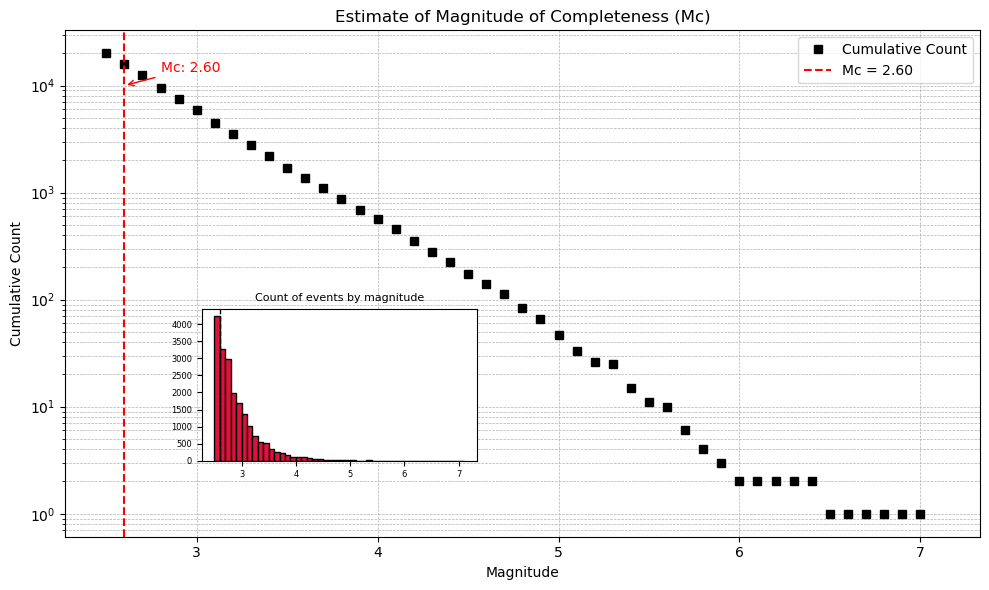

2.6

In [20]:
estimate_mc(cali_usgs_df)

In [22]:
cali_usgs_df = cali_usgs_df[cali_usgs_df["mag"]>=2.60]
len(cali_usgs_df)

15763

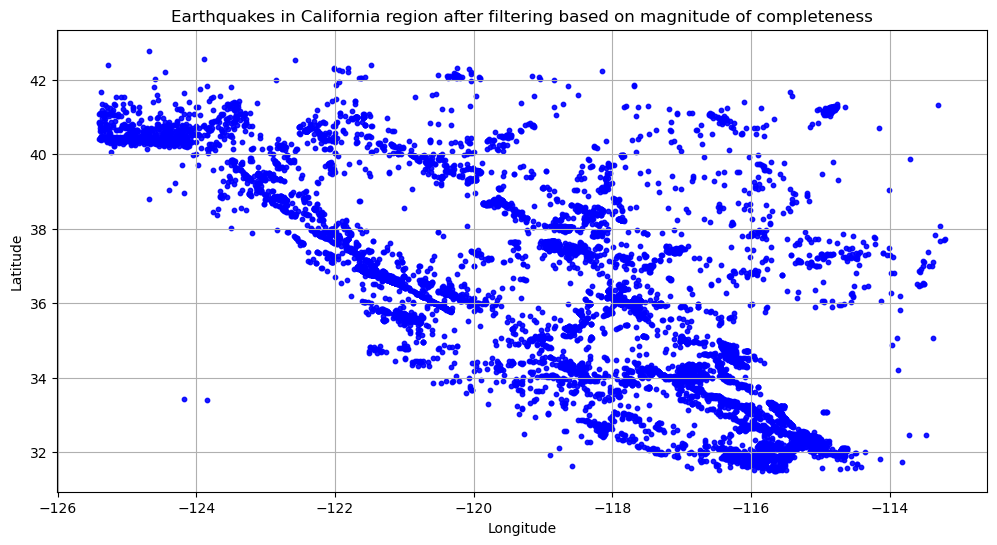

In [24]:
import matplotlib.pyplot as plt

# Plot spatial distribution before and after ETAS declustering
plt.figure(figsize=(12, 6))

# All events (before declustering)

plt.scatter(cali_usgs_df["longitude"], cali_usgs_df["latitude"], s=10, c="blue", alpha=0.9)
plt.title("Earthquakes in California region after filtering based on magnitude of completeness")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

In [20]:
cali_usgs_df.to_csv("cali_usgs_df.csv",index= False)

In [25]:
df = cali_usgs_df

In [26]:
import numpy as np
from geopy.distance import great_circle

def fisher_kernel_distance(lat1, lon1, lat2, lon2, kappa):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    delta = np.arccos(
        np.sin(lat1) * np.sin(lat2) +
        np.cos(lat1) * np.cos(lat2) * np.cos(lon2 - lon1)
    )
    return np.exp(-kappa * np.sin(delta / 2)**2)

kappa0 = 1000
n = len(df)
chi = np.zeros(n)

for i in range(n):
    lat1, lon1 = df.iloc[i][['latitude', 'longitude']]
    chi[i] = np.sum([
        fisher_kernel_distance(lat1, lon1, df.iloc[j]['latitude'], df.iloc[j]['longitude'], kappa0)
        for j in range(n)
    ])


C:\Users\aayan\AppData\Local\Temp\ipykernel_14444\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_14444\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_14444\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_14444\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_14444\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_14444\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppData\Local\Temp\ipykernel_14444\1026030000.py:7: RuntimeWarning: invalid value encountered in arccos
  delta = np.arccos(
C:\Users\aayan\AppDa

KeyboardInterrupt: 